#### Reference to the dataset : https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data

### Importing the dataset - Fashion Mnist
#### The dataset contains clothes pictures 28x28 ( already splitted in train and test )

In [1]:
import tensorflow
from tensorflow import keras

dataset = keras.datasets.fashion_mnist
((train_images,train_id) , (test_images,test_id)) = dataset.load_data()

#### Size of Dataset

In [2]:
print('Test Imagens  : ' + str(test_images.shape) + ' | ' 'Test ID  : ' + str(test_id.shape) )
print('Train Imagens : ' + str(train_images.shape) + ' | ' 'Train ID : ' + str(train_id.shape) )

Test Imagens  : (10000, 28, 28) | Test ID  : (10000,)
Train Imagens : (60000, 28, 28) | Train ID : (60000,)


#### Viewing a sample of the dataset
#### In reference guide of dataset we can see that dataset have 10 fashion categories

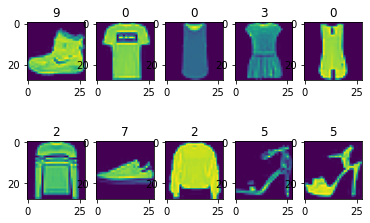

In [3]:
import matplotlib.pyplot as plt

for image in range(10):
    plt.subplot(2,5,image + 1)
    plt.imshow(train_images[image])
    plt.title(train_id[image])

#### Checking color gradation of the pictures

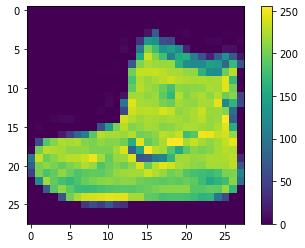

In [4]:
# get a example
plt.imshow(train_images[0])
plt.colorbar()

#### We need to normalize the color gradation from 0 to 1

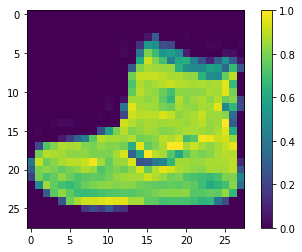

In [5]:
# just divide all pictures to 255
train_images = train_images/255.0 
train_id     = train_id/255.0 
test_images  = test_images/255.0 
test_id      = test_id/255.0

plt.imshow(train_images[0])
plt.colorbar()

## Building the First Neural Network Model

In [6]:
model = keras.Sequential([
    # input layer  - flattens the images into a one-dimensional vector
    keras.layers.Flatten(input_shape =  (28, 28)),
    # hidden layer
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    # exit layer - 10 existing categories
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

# get summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


## Compiling the First Model

In [7]:
model.compile(
    # stochastic downward gradient with moment estimate (recalculates biases)
    optimizer = 'adam' , 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

## Training the first Model
##### Over the Epochs the loss should decrease and the acc increase

In [8]:
history = model.fit(
    x = train_images , 
    y = train_id , 
    epochs = 8, 
    # 20% of train dataset will be use to make validation over training
    validation_split = 0.2
)

Epoch 1/8
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0027 - accuracy: 0.0991 - val_loss: 1.2368e-06 - val_accuracy: 0.1030
Epoch 2/8
1500/1500 [==============================] - 13s 9ms/step - loss: 9.8046e-07 - accuracy: 0.0993 - val_loss: 2.0568e-07 - val_accuracy: 0.1030
Epoch 3/8
1500/1500 [==============================] - 16s 11ms/step - loss: 2.6776e-07 - accuracy: 0.0993 - val_loss: 7.8950e-08 - val_accuracy: 0.1030
Epoch 4/8
1500/1500 [==============================] - 16s 11ms/step - loss: 1.1257e-07 - accuracy: 0.0993 - val_loss: 3.2156e-08 - val_accuracy: 0.1030
Epoch 5/8
1500/1500 [==============================] - 16s 11ms/step - loss: 4.7912e-08 - accuracy: 0.0993 - val_loss: 1.2676e-08 - val_accuracy: 0.1030
Epoch 6/8
1500/1500 [==============================] - 16s 11ms/step - loss: 1.9772e-08 - accuracy: 0.0993 - val_loss: 6.1988e-09 - val_accuracy: 0.1030
Epoch 7/8
1500/1500 [==============================] - 13s 9ms/step - loss: 9.2974e-09 

## Evaluating the First Model

In [9]:
test_lost , test_acc = model.evaluate(test_images,test_id)

313/313 [==============================] - 2s 6ms/step - loss: 2.6703e-09 - accuracy: 0.1000


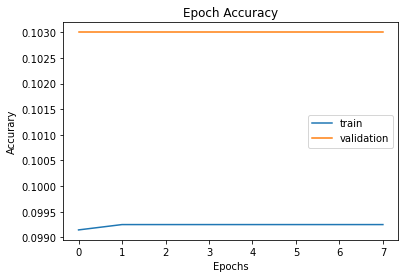

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Epoch Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accurary')
plt.legend(['train','validation'])

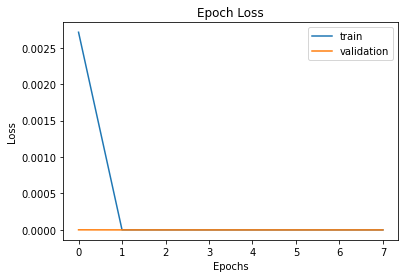

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Epoch Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','validation'])